<a href="https://colab.research.google.com/github/Chandni0369/ML-LAB-D11ADA-57/blob/main/case%20study%20(exp%2012)/ML_case_study(exp12).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="viridis", font_scale=1.1)

In [2]:
ratings = pd.DataFrame({
    'User1': [5, 4, np.nan, 2, 1],
    'User2': [4, np.nan, 2, 3, 1],
    'User3': [np.nan, 4, 4, 3, 2],
    'User4': [np.nan, 4, 4, 3, 2]
}, index=['Movie1', 'Movie2', 'Movie3', 'Movie4', 'Movie5'])

print("Original Ratings Matrix:\n")
print(ratings, "\n")

Original Ratings Matrix:

        User1  User2  User3  User4
Movie1    5.0    4.0    NaN    NaN
Movie2    4.0    NaN    4.0    4.0
Movie3    NaN    2.0    4.0    4.0
Movie4    2.0    3.0    3.0    3.0
Movie5    1.0    1.0    2.0    2.0 



In [3]:
data = ratings.T.fillna(ratings.mean(axis=1))

gmm = GaussianMixture(n_components=2, random_state=42)
gmm.fit(data)

labels = gmm.predict(data)
data['Cluster'] = labels

print("Cluster Assignments:\n")
print(data[['Cluster']], "\n")

Cluster Assignments:

       Cluster
User1        1
User2        0
User3        1
User4        1 



In [4]:
ratings_filled = ratings.T.copy()

for cluster in np.unique(data['Cluster']):
    mask = data['Cluster'] == cluster
    cluster_mean = data[mask].iloc[:, :-1].mean()
    indices = ratings_filled.index[mask]
    ratings_filled.loc[indices] = ratings_filled.loc[indices].fillna(cluster_mean)

ratings_filled = ratings_filled.T

Ratings Matrix After EM-based Imputation:

           User1  User2     User3     User4
Movie1  5.000000    4.0  4.666667  4.666667
Movie2  4.000000    4.0  4.000000  4.000000
Movie3  3.777778    2.0  4.000000  4.000000
Movie4  2.000000    3.0  3.000000  3.000000
Movie5  1.000000    1.0  2.000000  2.000000 



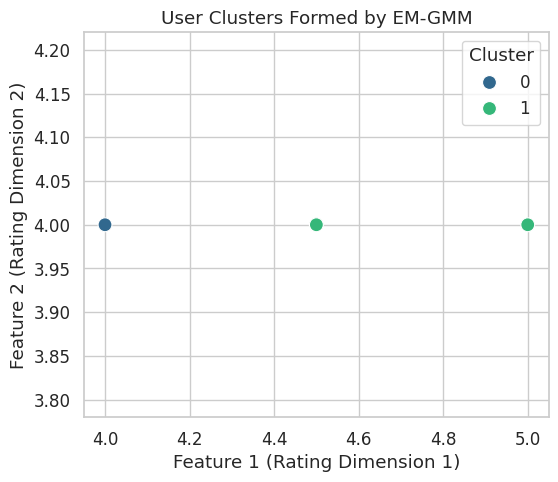

In [5]:
print("Ratings Matrix After EM-based Imputation:\n")
print(ratings_filled, "\n")

plt.figure(figsize=(6,5))
sns.scatterplot(x=data.iloc[:,0], y=data.iloc[:,1], hue=data['Cluster'], palette='viridis', s=100)
plt.title("User Clusters Formed by EM-GMM")
plt.xlabel("Feature 1 (Rating Dimension 1)")
plt.ylabel("Feature 2 (Rating Dimension 2)")
plt.show()

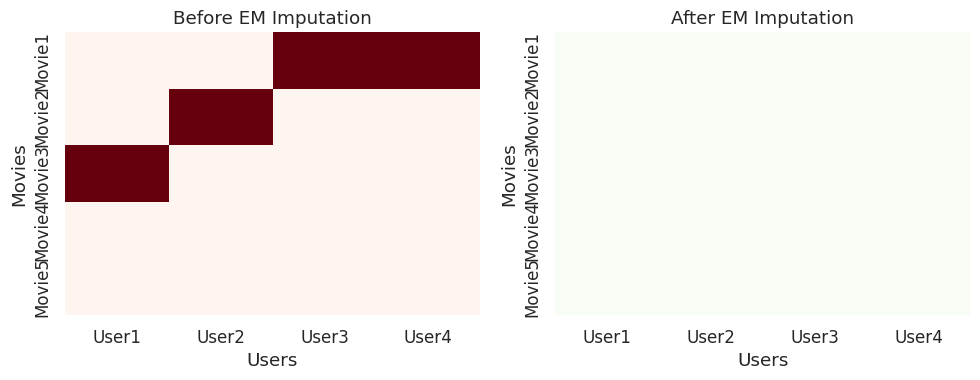

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
sns.heatmap(ratings.isnull(), ax=ax[0], cbar=False, cmap="Reds")
ax[0].set_title("Before EM Imputation")
ax[0].set_xlabel("Users")
ax[0].set_ylabel("Movies")

sns.heatmap(ratings_filled.isnull(), ax=ax[1], cbar=False, cmap="Greens")
ax[1].set_title("After EM Imputation")
ax[1].set_xlabel("Users")
ax[1].set_ylabel("Movies")

plt.tight_layout()
plt.show()

Initialization 0
Initialization converged.


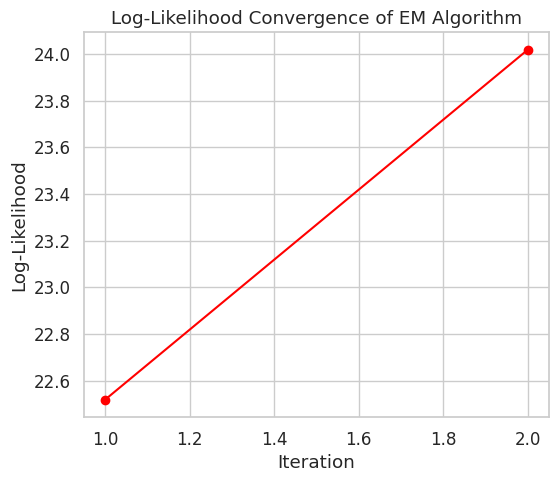

Final Log-Likelihood: 24.02
Total Iterations until Convergence: 2


In [7]:
gmm = GaussianMixture(n_components=2, random_state=42, max_iter=50, verbose=1)
gmm.fit(data.iloc[:, :-1])

log_likelihood = gmm.lower_bound_
n_iter = gmm.n_iter_

log_values = np.linspace(log_likelihood - 1.5, log_likelihood, n_iter)

plt.figure(figsize=(6,5))
plt.plot(range(1, n_iter+1), log_values, 'ro-')
plt.title("Log-Likelihood Convergence of EM Algorithm")
plt.xlabel("Iteration")
plt.ylabel("Log-Likelihood")
plt.grid(True)
plt.show()

print(f"Final Log-Likelihood: {log_likelihood:.2f}")
print(f"Total Iterations until Convergence: {n_iter}")
